## Test for Making Figures for ID Boise Sawtooth NF Timber Harvest Treatments

### Author: Katie Murenbeeld
### Init_Date: 24 May 2019
### Update: 

#### Testing out making different stacked bar plots and other figures to represent the changes in reforestation treatments through time in Idaho National Forests.

In [1]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [74]:
# Set the directory for the modified data
mod_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/MOD/'
output_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/OUTPUT/'

In [3]:
# Read in csv and check data
ID_SNF_SRF = pd.read_csv(mod_data_dir + 'ID_SNF_SRF.csv').reset_index()
ID_SNF_SRF.head(5)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_C,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp
0,0,13068,Plant Trees,4431,19.0,2009-05-18,2009-06-16,2009-06-16,Sawtooth National Forest,ID,2009-05-18,2009-06-16,2009-06-16
1,1,189132,Certification of Natural Regeneration without ...,4382,4.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25
2,2,189133,Certification of Natural Regeneration without ...,4382,6.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25
3,3,189140,Plant Trees,4431,10.0,2014-07-15,2014-07-17,2014-10-03,Sawtooth National Forest,ID,2014-07-15,2014-07-17,2014-10-03
4,4,190583,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25


In [4]:
ID_SNF_SRF_COMP = ID_SNF_SRF.dropna(axis=0).reset_index()
ID_SNF_SRF_COMP.head(5)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_C,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp
0,0,0,13068,Plant Trees,4431,19.0,2009-05-18,2009-06-16,2009-06-16,Sawtooth National Forest,ID,2009-05-18,2009-06-16,2009-06-16
1,1,1,189132,Certification of Natural Regeneration without ...,4382,4.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25
2,2,2,189133,Certification of Natural Regeneration without ...,4382,6.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25
3,3,3,189140,Plant Trees,4431,10.0,2014-07-15,2014-07-17,2014-10-03,Sawtooth National Forest,ID,2014-07-15,2014-07-17,2014-10-03
4,4,4,190583,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25


In [5]:
# Make the DATE_PLANN into serial dates
ID_SNF_SRF_datearrP = ID_SNF_SRF['DATE_PLANN'].values
ID_SNF_SRF_datearr_dtP = pd.to_datetime(ID_SNF_SRF_datearrP)
ID_SNF_SRF['SerDatesPlan'] = ID_SNF_SRF_datearr_dtP

In [6]:
# Break out the year, month, and day and add as a column to the array
ID_SNF_SRF['Y'] = ID_SNF_SRF['SerDatesPlan'].dt.year
ID_SNF_SRF['M'] = ID_SNF_SRF['SerDatesPlan'].dt.month
ID_SNF_SRF['D'] = ID_SNF_SRF['SerDatesPlan'].dt.day
#ID_SNF_SRF.to_csv('ID_SNF_SRF_DATES.csv', sep='\t', encoding='utf-8')
ID_SNF_SRF.head(10)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_C,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,0,13068,Plant Trees,4431,19.0,2009-05-18,2009-06-16,2009-06-16,Sawtooth National Forest,ID,2009-05-18,2009-06-16,2009-06-16,2009,5,18
1,1,189132,Certification of Natural Regeneration without ...,4382,4.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
2,2,189133,Certification of Natural Regeneration without ...,4382,6.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
3,3,189140,Plant Trees,4431,10.0,2014-07-15,2014-07-17,2014-10-03,Sawtooth National Forest,ID,2014-07-15,2014-07-17,2014-10-03,2014,7,15
4,4,190583,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
5,5,190586,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
6,6,190587,Certification of Natural Regeneration without ...,4382,2.0,2008-09-30,2011-02-18,2011-02-18,Sawtooth National Forest,ID,2008-09-30,2011-02-18,2011-02-18,2008,9,30
7,7,190591,Certification of Natural Regeneration without ...,4382,1.0,2008-09-30,2011-02-18,2011-02-18,Sawtooth National Forest,ID,2008-09-30,2011-02-18,2011-02-18,2008,9,30
8,8,190592,Certification of Natural Regeneration without ...,4382,5.0,2013-09-30,2013-09-30,2013-09-30,Sawtooth National Forest,ID,2013-09-30,2013-09-30,2013-09-30,2013,9,30
9,9,191593,Certification of Natural Regeneration without ...,4382,3.0,2013-09-30,2013-09-30,2013-09-30,Sawtooth National Forest,ID,2013-09-30,2013-09-30,2013-09-30,2013,9,30


In [7]:
# Repeat for Completed Activities

# Make the DATE_COMPL into serial dates
ID_SNF_SRF_COMP_datearrP = ID_SNF_SRF_COMP['DATE_COMPL'].values
ID_SNF_SRF_COMP_datearr_dtP = pd.to_datetime(ID_SNF_SRF_COMP_datearrP)
ID_SNF_SRF_COMP['SerDatesComp'] = ID_SNF_SRF_COMP_datearr_dtP

In [9]:
# Break out the year, month, and day and add as a column to the array
ID_SNF_SRF_COMP['Y'] = ID_SNF_SRF_COMP['SerDatesComp'].dt.year
ID_SNF_SRF_COMP['M'] = ID_SNF_SRF_COMP['SerDatesComp'].dt.month
ID_SNF_SRF_COMP['D'] = ID_SNF_SRF_COMP['SerDatesComp'].dt.day
#ID_SNF_SRF_COMP.to_csv('ID_SNF_SRF_COMP_DATES.csv', sep='\t', encoding='utf-8')
ID_SNF_SRF_COMP.head(10)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_C,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,0,0,13068,Plant Trees,4431,19.0,2009-05-18,2009-06-16,2009-06-16,Sawtooth National Forest,ID,2009-05-18,2009-06-16,2009-06-16,2009,6,16
1,1,1,189132,Certification of Natural Regeneration without ...,4382,4.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
2,2,2,189133,Certification of Natural Regeneration without ...,4382,6.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
3,3,3,189140,Plant Trees,4431,10.0,2014-07-15,2014-07-17,2014-10-03,Sawtooth National Forest,ID,2014-07-15,2014-07-17,2014-10-03,2014,10,3
4,4,4,190583,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
5,5,5,190586,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
6,6,6,190587,Certification of Natural Regeneration without ...,4382,2.0,2008-09-30,2011-02-18,2011-02-18,Sawtooth National Forest,ID,2008-09-30,2011-02-18,2011-02-18,2011,2,18
7,7,7,190591,Certification of Natural Regeneration without ...,4382,1.0,2008-09-30,2011-02-18,2011-02-18,Sawtooth National Forest,ID,2008-09-30,2011-02-18,2011-02-18,2011,2,18
8,8,8,190592,Certification of Natural Regeneration without ...,4382,5.0,2013-09-30,2013-09-30,2013-09-30,Sawtooth National Forest,ID,2013-09-30,2013-09-30,2013-09-30,2013,9,30
9,9,9,191593,Certification of Natural Regeneration without ...,4382,3.0,2013-09-30,2013-09-30,2013-09-30,Sawtooth National Forest,ID,2013-09-30,2013-09-30,2013-09-30,2013,9,30


### Let's make a time series lone plot

In [10]:
# Group data by year

#ID_BNF_TH_year = ID_BNF_TH['Y'].values
ID_SNF_SRF_year = ID_SNF_SRF.groupby('Y').sum() 
ID_SNF_SRF_year = ID_SNF_SRF_year.reset_index()
ID_SNF_SRF_year

,Y,index,Unnamed: 0,ACTIVITY_C,NBR_UNITS1,M,D
0,1973,71,793925,8982,18.0,18,52
1,1974,107,823759,8982,24.0,18,52
2,1980,101,822107,8862,16.0,12,2
3,1981,380,3264784,35448,118.0,48,8
4,1986,85,807719,8864,10.0,12,8
5,1999,99,822105,8864,14.0,14,60
6,2004,91,808261,8864,6.0,18,56
7,2008,656,6402250,70112,144.0,152,472
8,2009,340,2867544,35448,86.0,40,174
9,2010,81,806735,8764,500.0,12,36


In [11]:
# Create variables for the year and area treated for use in plotting

Year_SNF_SRF = ID_SNF_SRF_year['Y'].values
SNF_SRF_Acres = ID_SNF_SRF_year['NBR_UNITS1'].values

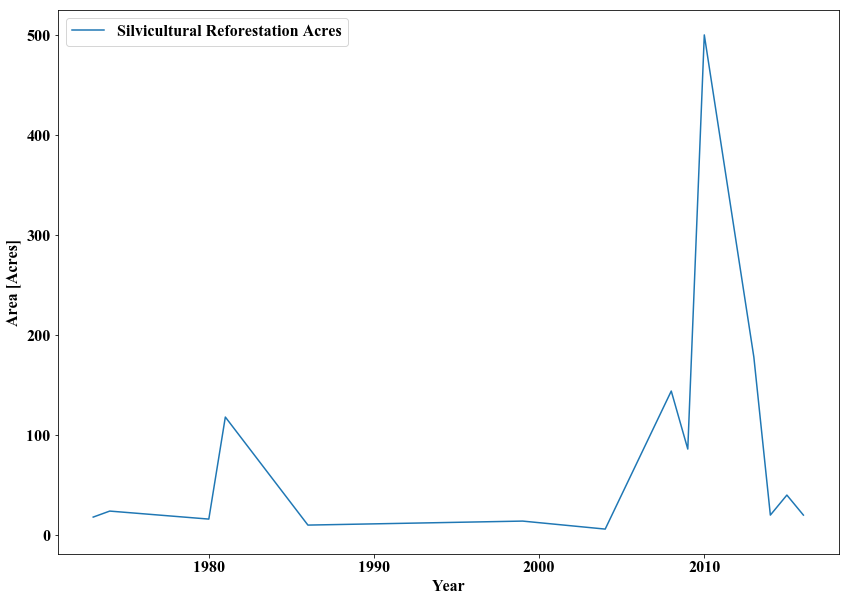

In [12]:
# Use matplotlib and RCparams to create a line plot of treatments through time

fig1 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

plt.plot(Year_SNF_SRF,SNF_SRF_Acres,label="Silvicultural Reforestation Acres")
#plt.plot(Year_MTBS,MTBS_Acres, color='red', label="Burned Acres")
#plt.plot(Year_RAVG,RAVG_Acres, color='red')
plt.xlabel('Year')
plt.ylabel('Area [Acres]')
#plt.title('Area Burned in Boise National Forest')
#plt.savefig('Area_Burned_HFT_BNF.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.legend()
plt.show()

In [13]:
# Repeat for completed activities

# Group data by year

#ID_BNF_TH_year = ID_BNF_TH['Y'].values
ID_SNF_SRF_COMP_year = ID_SNF_SRF_COMP.groupby('Y').sum() 
ID_SNF_SRF_COMP_year = ID_SNF_SRF_COMP_year.reset_index()
ID_SNF_SRF_COMP_year

,Y,level_0,index,Unnamed: 0,ACTIVITY_C,NBR_UNITS1,M,D
0,1973,71,71,793925,8982,18.0,18,52
1,1974,107,107,823759,8982,24.0,18,52
2,1980,101,101,822107,8862,16.0,12,2
3,1981,380,380,3264784,35448,118.0,48,8
4,1986,85,85,807719,8864,10.0,12,8
5,1999,99,99,822105,8864,14.0,14,60
6,2004,91,91,808261,8864,6.0,18,56
7,2008,370,370,3251602,35056,112.0,80,232
8,2009,340,340,2867544,35448,86.0,48,100
9,2010,81,81,806735,8764,500.0,12,42


In [16]:
# Create variables for the year and area treated for use in plotting

Year_SNF_SRF_COMP = ID_SNF_SRF_COMP_year['Y'].values
SNF_SRF_Acres_COMP = ID_SNF_SRF_COMP_year['NBR_UNITS1'].values

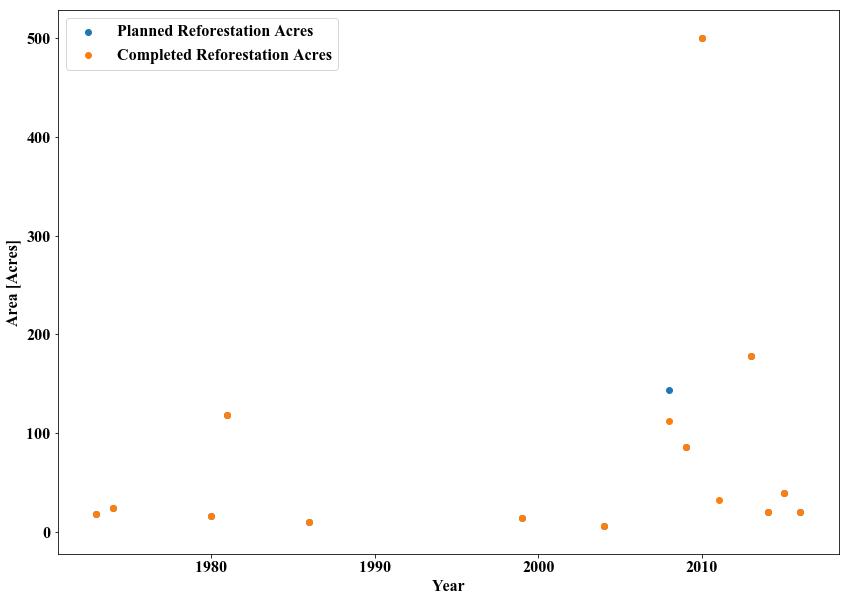

In [18]:
# Use matplotlib and RCparams to create a line plot of treatments through time
# Let's compare the two lines

fig2 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

plt.scatter(Year_SNF_SRF,SNF_SRF_Acres,label="Planned Reforestation Acres")
plt.scatter(Year_SNF_SRF_COMP,SNF_SRF_Acres_COMP,label="Completed Reforestation Acres")
#plt.plot(Year_RAVG,RAVG_Acres, color='red')
plt.xlabel('Year')
plt.ylabel('Area [Acres]')
#plt.title('Area Burned in Boise National Forest')
#plt.savefig('Area_Burned_HFT_BNF.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)
plt.legend()
plt.show()

### Let's start the stacked bar charts

### First we need to find the most common activities 

In [20]:
# Use the groupby and sorting ".nlargest" to find the top reforestation activities.

snf_srf_topten = ID_SNF_SRF[['ACTIVITY_N','ACTIVITY_C']]
snf_srf_topten = snf_srf_topten.groupby(['ACTIVITY_N'])['ACTIVITY_C'].size().nlargest(10)
snf_srf_topten = snf_srf_topten.reset_index(name='TopTenCount')
snf_srf_topten

,ACTIVITY_N,TopTenCount
0,Certification of Natural Regeneration without ...,48
1,Plant Trees,28
2,Fill-in or Replant Trees,6
3,Site Preparation for Natural Regeneration - Bu...,4


In [22]:
# Use .loc to sort out the specific treatment --> can use the name string or the numerical activity code
# In this case the most common reforestation activity planned in SNF is Certification of regrowth

ID_SNF_SRFcertregrow = ID_SNF_SRF.loc[ID_SNF_SRF['ACTIVITY_C'] == 4382].copy()
ID_SNF_SRFcertregrow.head(5)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_C,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
1,1,189132,Certification of Natural Regeneration without ...,4382,4.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
2,2,189133,Certification of Natural Regeneration without ...,4382,6.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
4,4,190583,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
5,5,190586,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
6,6,190587,Certification of Natural Regeneration without ...,4382,2.0,2008-09-30,2011-02-18,2011-02-18,Sawtooth National Forest,ID,2008-09-30,2011-02-18,2011-02-18,2008,9,30


In [24]:
# Sort out the second most common activity planned --> Plant Trees

ID_SNF_SRFplanttrees = ID_SNF_SRF.loc[ID_SNF_SRF['ACTIVITY_C'] == 4431].copy()
ID_SNF_SRFplanttrees.head(5)

,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_C,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,0,13068,Plant Trees,4431,19.0,2009-05-18,2009-06-16,2009-06-16,Sawtooth National Forest,ID,2009-05-18,2009-06-16,2009-06-16,2009,5,18
3,3,189140,Plant Trees,4431,10.0,2014-07-15,2014-07-17,2014-10-03,Sawtooth National Forest,ID,2014-07-15,2014-07-17,2014-10-03,2014,7,15
15,15,208349,Plant Trees,4431,23.0,1981-06-01,1981-06-01,1981-06-01,Sawtooth National Forest,ID,1981-06-01,1981-06-01,1981-06-01,1981,6,1
17,17,208351,Plant Trees,4431,10.0,2015-07-10,2015-07-10,2015-10-05,Sawtooth National Forest,ID,2015-07-10,2015-07-10,2015-10-05,2015,7,10
20,20,210735,Plant Trees,4431,9.0,1981-06-01,1981-06-01,1981-06-01,Sawtooth National Forest,ID,1981-06-01,1981-06-01,1981-06-01,1981,6,1


In [18]:
# Sort out the third most common activity planned --> Fill in or replant, use ACTIVITY_C number instead of string name
# Will not show the third, the top two make up the vast majority of the reforestation treatments in Boise National Forest

#ID_BNF_SRFfillin = ID_BNF_SRF.loc[ID_BNF_SRF['ACTIVITY_C'] == ].copy()
#ID_BNF_SRFfillin.head(5)

In [25]:
# Repeat for the completed activites

# Use the groupby and sorting ".nlargest" to find the top ten timber harvest activities.

snf_srf_comp_topten = ID_SNF_SRF_COMP[['ACTIVITY_N','ACTIVITY_C']]
snf_srf_comp_topten = snf_srf_comp_topten.groupby(['ACTIVITY_N'])['ACTIVITY_C'].size().nlargest(10)
snf_srf_comp_topten = snf_srf_comp_topten.reset_index(name='TopTenCount')
snf_srf_comp_topten

,ACTIVITY_N,TopTenCount
0,Certification of Natural Regeneration without ...,48
1,Plant Trees,28
2,Fill-in or Replant Trees,6
3,Site Preparation for Natural Regeneration - Bu...,4


In [28]:
# Use .loc to sort out the specific treatment --> can use the name string or the numerical activity code
# In this case the most common reforestion activity completed in SNF is certification of regrowth

ID_SNF_SRF_COMP_certregrow = ID_SNF_SRF_COMP.loc[ID_SNF_SRF_COMP['ACTIVITY_C'] == 4382].copy()
ID_SNF_SRF_COMP_certregrow.head(5)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_C,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
1,1,1,189132,Certification of Natural Regeneration without ...,4382,4.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
2,2,2,189133,Certification of Natural Regeneration without ...,4382,6.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
4,4,4,190583,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
5,5,5,190586,Certification of Natural Regeneration without ...,4382,3.0,2013-09-25,2013-09-25,2013-09-25,Sawtooth National Forest,ID,2013-09-25,2013-09-25,2013-09-25,2013,9,25
6,6,6,190587,Certification of Natural Regeneration without ...,4382,2.0,2008-09-30,2011-02-18,2011-02-18,Sawtooth National Forest,ID,2008-09-30,2011-02-18,2011-02-18,2011,2,18


In [29]:
# Sort out the second most common activity completed --> Plant Trees

ID_SNF_SRF_COMP_planttrees = ID_SNF_SRF_COMP.loc[ID_SNF_SRF_COMP['ACTIVITY_C'] == 4431].copy()
ID_SNF_SRF_COMP_planttrees.head(5)

,level_0,index,Unnamed: 0,ACTIVITY_N,ACTIVITY_C,NBR_UNITS1,DATE_PLANN,DATE_ACCOM,DATE_COMPL,ADMIN_FO_1,STATE_ABBR,SerDatesPlan,SerDatesAccom,SerDatesComp,Y,M,D
0,0,0,13068,Plant Trees,4431,19.0,2009-05-18,2009-06-16,2009-06-16,Sawtooth National Forest,ID,2009-05-18,2009-06-16,2009-06-16,2009,6,16
3,3,3,189140,Plant Trees,4431,10.0,2014-07-15,2014-07-17,2014-10-03,Sawtooth National Forest,ID,2014-07-15,2014-07-17,2014-10-03,2014,10,3
15,15,15,208349,Plant Trees,4431,23.0,1981-06-01,1981-06-01,1981-06-01,Sawtooth National Forest,ID,1981-06-01,1981-06-01,1981-06-01,1981,6,1
17,17,17,208351,Plant Trees,4431,10.0,2015-07-10,2015-07-10,2015-10-05,Sawtooth National Forest,ID,2015-07-10,2015-07-10,2015-10-05,2015,10,5
20,20,20,210735,Plant Trees,4431,9.0,1981-06-01,1981-06-01,1981-06-01,Sawtooth National Forest,ID,1981-06-01,1981-06-01,1981-06-01,1981,6,1


In [22]:
# Sort out the third most common activity completed --> Salvage Cut
# No third activity

#ID_BNF_SRF_COMP_fillin = ID_BNF_SRF_COMP.loc[ID_BNF_SRF_COMP['ACTIVITY_C'] == ].copy()
#ID_BNF_SRF_COMP_fillin.head(5)

In [30]:
# The next next is to group the data by year and export as csv
# Start with all the planned treatments

ID_SNF_SRFcertregrow_year = ID_SNF_SRFcertregrow.groupby('Y').sum() 
ID_SNF_SRFcertregrow_year = ID_SNF_SRFcertregrow_year.reset_index()
ID_SNF_SRFcertregrow_year.to_csv(mod_data_dir + 'ID_SNF_SRFcertregrow_year.csv', encoding = 'utf-8')

In [31]:
#Check the data

ID_SNF_SRFcertregrow_year

,Y,index,Unnamed: 0,ACTIVITY_C,NBR_UNITS1,M,D
0,2008,656,6402250,70112,144.0,152,472
1,2010,81,806735,8764,500.0,12,36
2,2013,1205,11948365,131460,168.0,270,778


In [33]:
ID_SNF_SRFplanttrees_year = ID_SNF_SRFplanttrees.groupby('Y').sum() 
ID_SNF_SRFplanttrees_year = ID_SNF_SRFplanttrees_year.reset_index()
ID_SNF_SRFplanttrees_year.to_csv(mod_data_dir + 'ID_SNF_SRFplanttrees_year.csv', encoding = 'utf-8')

ID_SNF_SRFplanttrees_year

,Y,index,Unnamed: 0,ACTIVITY_C,NBR_UNITS1,M,D
0,1980,101,822107,8862,16.0,12,2
1,1981,380,3264784,35448,118.0,48,8
2,2009,340,2867544,35448,86.0,40,174
3,2013,97,822103,8862,10.0,16,38
4,2014,49,763547,8862,20.0,14,30
5,2015,204,1946178,17724,40.0,24,44
6,2016,89,807725,8862,20.0,14,22


In [34]:
# Now repeat for the completed activities

ID_SNF_SRF_COMP_certregrow_year = ID_SNF_SRF_COMP_certregrow.groupby('Y').sum()
ID_SNF_SRF_COMP_certregrow_year = ID_SNF_SRF_COMP_certregrow_year.reset_index()
ID_SNF_SRF_COMP_certregrow_year.to_csv(mod_data_dir + 'ID_SNF_SRF_COMP_certregrow_year.csv', encoding = 'utf-8')

ID_SNF_SRF_COMP_certregrow_year

,Y,level_0,index,Unnamed: 0,ACTIVITY_C,NBR_UNITS1,M,D
0,2008,370,370,3251602,35056,112.0,80,232
1,2010,81,81,806735,8764,500.0,12,42
2,2011,286,286,3150648,35056,32.0,16,144
3,2013,1205,1205,11948365,131460,168.0,270,790


In [35]:
ID_SNF_SRF_COMP_planttrees_year = ID_SNF_SRF_COMP_planttrees.groupby('Y').sum()
ID_SNF_SRF_COMP_planttrees_year = ID_SNF_SRF_COMP_planttrees_year.reset_index()
ID_SNF_SRF_COMP_planttrees_year.to_csv(mod_data_dir + 'ID_SNF_SRF_COMP_planttrees_year.csv', encoding = 'utf-8')

ID_SNF_SRF_COMP_planttrees_year

,Y,level_0,index,Unnamed: 0,ACTIVITY_C,NBR_UNITS1,M,D
0,1980,101,101,822107,8862,16.0,12,2
1,1981,380,380,3264784,35448,118.0,48,8
2,2009,340,340,2867544,35448,86.0,48,100
3,2013,97,97,822103,8862,10.0,18,58
4,2014,49,49,763547,8862,20.0,20,6
5,2015,204,204,1946178,17724,40.0,30,42
6,2016,89,89,807725,8862,20.0,20,20


### Because the arrays or dataframes need to be the same size to create the stacked bar plots, you will need to make sure that all years are represented in the file even if no area was treated. I ended up adjusting the .csvs on my laptop and reading in the modified csv. I'm sure there is a way to do this in python without having to export the csv and re-importing the modified csv.

In [36]:
# Read in and check the modified csvs
ID_SNF_SRFcertregrow_year_mod = pd.read_csv(mod_data_dir + 'ID_SNF_SRFcertregrow_year_mod.csv').reset_index(drop=True)
ID_SNF_SRFcertregrow_year_mod.head(5)

,Unnamed: 0,Y,index,Unnamed: 0.1,ACTIVITY_C,NBR_UNITS1,M,D
0,0,1980,NaN,NaN,NaN,0,NaN,NaN
1,1,1981,NaN,NaN,NaN,0,NaN,NaN
2,2,1982,NaN,NaN,NaN,0,NaN,NaN
3,3,1983,NaN,NaN,NaN,0,NaN,NaN
4,4,1984,NaN,NaN,NaN,0,NaN,NaN


In [37]:
ID_SNF_SRFplanttrees_year_mod = pd.read_csv(mod_data_dir + 'ID_SNF_SRFplanttrees_year_mod.csv').reset_index(drop=True)
ID_SNF_SRFplanttrees_year_mod.head(5)

,Unnamed: 0,Y,index,Unnamed: 0.1,ACTIVITY_C,NBR_UNITS1,M,D
0,0,1980,101.0,822107.0,8862.0,16,12.0,2.0
1,1,1981,380.0,3264784.0,35448.0,118,48.0,8.0
2,2,1982,NaN,NaN,NaN,0,NaN,NaN
3,3,1983,NaN,NaN,NaN,0,NaN,NaN
4,4,1984,NaN,NaN,NaN,0,NaN,NaN


In [38]:
ID_SNF_SRF_COMP_certregrow_year_mod = pd.read_csv(mod_data_dir + 'ID_SNF_SRF_COMP_certregrow_year_mod.csv').reset_index(drop=True)
ID_SNF_SRF_COMP_certregrow_year_mod.head(5)

,Unnamed: 0,Y,level_0,index,Unnamed: 0.1,ACTIVITY_C,NBR_UNITS1,M,D
0,0,1980,NaN,NaN,NaN,NaN,0,NaN,NaN
1,1,1981,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2,1982,NaN,NaN,NaN,NaN,0,NaN,NaN
3,3,1983,NaN,NaN,NaN,NaN,0,NaN,NaN
4,4,1984,NaN,NaN,NaN,NaN,0,NaN,NaN


In [39]:
ID_SNF_SRF_COMP_planttrees_year_mod = pd.read_csv(mod_data_dir + 'ID_SNF_SRF_COMP_planttrees_year_mod.csv').reset_index(drop=True)
ID_SNF_SRF_COMP_planttrees_year_mod.head(5)

,Unnamed: 0,Y,level_0,index,Unnamed: 0.1,ACTIVITY_C,NBR_UNITS1,M,D
0,0,1980,101.0,101.0,822107.0,8862.0,16,12.0,2.0
1,1,1981,380.0,380.0,3264784.0,35448.0,118,48.0,8.0
2,2,1982,NaN,NaN,NaN,NaN,0,NaN,NaN
3,3,1983,NaN,NaN,NaN,NaN,0,NaN,NaN
4,4,1984,NaN,NaN,NaN,NaN,0,NaN,NaN


### Now create those stacked bar charts!!!

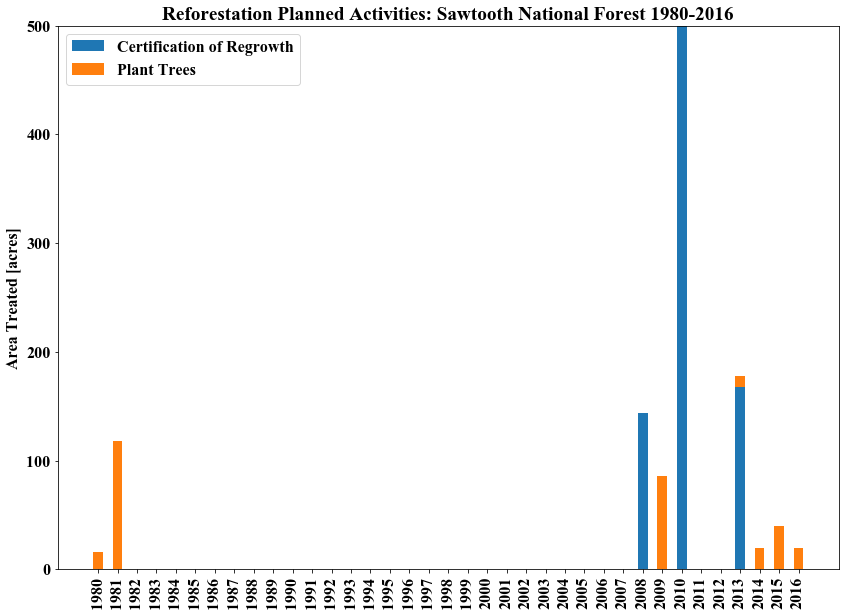

In [40]:
# Let's start with the planned activities

fig3 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

N = ID_SNF_SRFcertregrow_year_mod['Y'].values
ID_SNF_SRFcertregrow_acres = ID_SNF_SRFcertregrow_year_mod['NBR_UNITS1'].values
ID_SNF_SRFplanttrees_acres = ID_SNF_SRFplanttrees_year_mod['NBR_UNITS1'].values


ind = N    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

#bars = np.add(ID_BNF_THcommerthin_acres, ID_BNF_THimprovecut_acres).tolist()


p1 = plt.bar(ind, ID_SNF_SRFcertregrow_acres, width)
p2 = plt.bar(ind, ID_SNF_SRFplanttrees_acres, width,
             bottom=ID_SNF_SRFcertregrow_acres)
#p3 = plt.bar(ind, ID_BNF_THsalvcut_acres, width,
#             bottom=bars)

plt.ylabel('Area Treated [acres]')
plt.title('Reforestation Planned Activities: Sawtooth National Forest 1980-2016')
plt.xticks(ind, rotation=90)
plt.legend(('Certification of Regrowth','Plant Trees'))

plt.show()

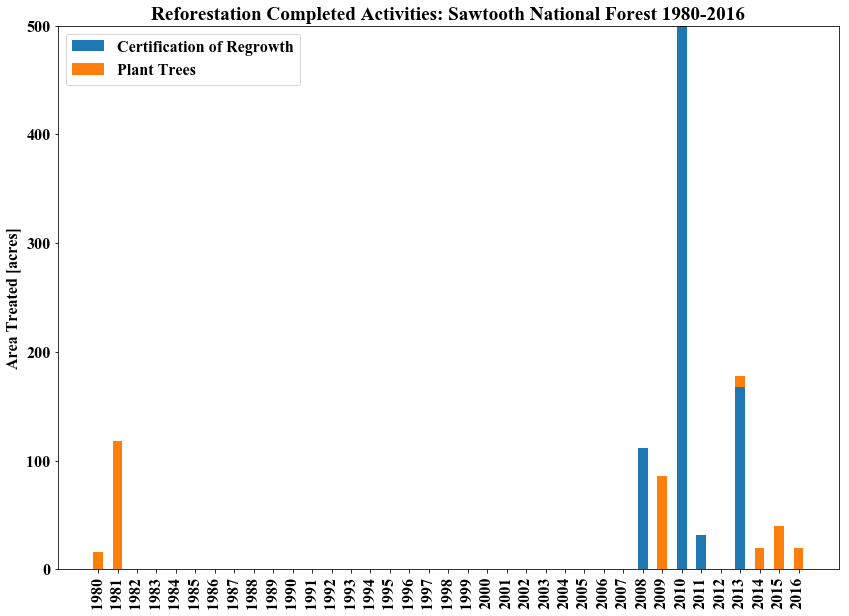

In [41]:
# And now the completed activities

fig4 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

N = ID_SNF_SRF_COMP_certregrow_year_mod['Y'].values
ID_SNF_SRF_COMP_certregrow_acres = ID_SNF_SRF_COMP_certregrow_year_mod['NBR_UNITS1'].values
ID_SNF_SRF_COMP_planttrees_acres = ID_SNF_SRF_COMP_planttrees_year_mod['NBR_UNITS1'].values
#ID_BNF_TH_COMP_salvcut_acres = ID_BNF_TH_COMP_salvcut_year_mod['NBR_UNITS1'].values

ind = N    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

bars = np.add(ID_SNF_SRF_COMP_certregrow_acres, ID_SNF_SRF_COMP_planttrees_acres).tolist()


p1 = plt.bar(ind, ID_SNF_SRF_COMP_certregrow_acres, width)
p2 = plt.bar(ind, ID_SNF_SRF_COMP_planttrees_acres, width,
             bottom=ID_SNF_SRF_COMP_certregrow_acres)
#p3 = plt.bar(ind, ID_BNF_TH_COMP_salvcut_acres, width,
#             bottom=bars)

plt.ylabel('Area Treated [acres]')
plt.title('Reforestation Completed Activities: Sawtooth National Forest 1980-2016')
plt.xticks(ind, rotation=90)
plt.legend(('Certification of Regrowth','Plant Trees'))

plt.show()

In [42]:
p_planttrees_months = ID_SNF_SRF.loc[ID_SNF_SRF['ACTIVITY_C']==4431].groupby(['M']).size().to_frame(name='count').reset_index()
p_planttrees_months

,M,count
0,5,10
1,6,10
2,7,6
3,8,2


In [47]:
def Insert_row_(row_number, dfp, row_value):
    df1 = dfp[0:row_number]
    df2 = dfp[row_number:]
    df1.loc[row_number]=row_value
    df_result = pd.concat([df1,df2])
    df_result.index = [*range(df_result.shape[0])]
    return df_result

row_number = 0
row_value = [1,0]
dfp = p_planttrees_months

if row_number > dfp.index.max()+1:
    print("Invalid row number")
else:
       dfp = Insert_row_(0, p_planttrees_months, [1,0])
        
print(dfp) 

   M  count
0  1      0
1  5     10
2  6     10
3  7      6
4  8      2


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:
if row_number > dfp.index.max()+1:
    print("Invalid row number")
else:
       dfp = Insert_row_(1, dfp, [2,0])
        
print(dfp) 

   M  count
0  1      0
1  2      0
2  5     10
3  6     10
4  7      6
5  8      2


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
if row_number > dfp.index.max()+1:
    print("Invalid row number")
else:
       dfp = Insert_row_(2, dfp, [3,0])
        
print(dfp) 

   M  count
0  1      0
1  2      0
2  3      0
3  5     10
4  6     10
5  7      6
6  8      2


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
if row_number > dfp.index.max()+1:
    print("Invalid row number")
else:
       dfp = Insert_row_(3, dfp, [4,0])
        
print(dfp) 

   M  count
0  1      0
1  2      0
2  3      0
3  4      0
4  5     10
5  6     10
6  7      6
7  8      2


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [52]:
if row_number > dfp.index.max()+1:
    print("Invalid row number")
else:
       dfp = Insert_row_(8, dfp, [9,0])
        
print(dfp) 

   M  count
0  1      0
1  2      0
2  3      0
3  4      0
4  5     10
5  6     10
6  7      6
7  8      2
8  9      0


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [53]:
if row_number > dfp.index.max()+1:
    print("Invalid row number")
else:
       dfp = Insert_row_(9, dfp, [10,0])
        
print(dfp) 

    M  count
0   1      0
1   2      0
2   3      0
3   4      0
4   5     10
5   6     10
6   7      6
7   8      2
8   9      0
9  10      0


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [54]:
if row_number > dfp.index.max()+1:
    print("Invalid row number")
else:
       dfp = Insert_row_(10, dfp, [11,0])
        
print(dfp) 

     M  count
0    1      0
1    2      0
2    3      0
3    4      0
4    5     10
5    6     10
6    7      6
7    8      2
8    9      0
9   10      0
10  11      0


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [55]:
if row_number > dfp.index.max()+1:
    print("Invalid row number")
else:
       dfp = Insert_row_(11, dfp, [12,0])
        
print(dfp) 

     M  count
0    1      0
1    2      0
2    3      0
3    4      0
4    5     10
5    6     10
6    7      6
7    8      2
8    9      0
9   10      0
10  11      0
11  12      0


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [56]:
p_planttrees_months2 = dfp
p_planttrees_months2

,M,count
0,1,0
1,2,0
2,3,0
3,4,0
4,5,10
5,6,10
6,7,6
7,8,2
8,9,0
9,10,0


In [59]:
c_planttrees_months = ID_SNF_SRF_COMP.loc[ID_SNF_SRF_COMP['ACTIVITY_C']==4431].groupby(['M']).size().to_frame(name='count').reset_index()
c_planttrees_months

,M,count
0,5,2
1,6,18
2,9,2
3,10,6


In [60]:
def Insert_row_(row_number, df, row_value):
    df1 = df[0:row_number]
    df2 = df[row_number:]
    df1.loc[row_number]=row_value
    df_result = pd.concat([df1,df2])
    df_result.index = [*range(df_result.shape[0])]
    return df_result

row_number = 0
row_value = [1,0]
df = c_planttrees_months

if row_number > df.index.max()+1:
    print("Invalid row number")
else:
       df = Insert_row_(row_number, df, row_value)
        
print(df) 

    M  count
0   1      0
1   5      2
2   6     18
3   9      2
4  10      6


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [61]:
if row_number > df.index.max()+1:
    print("Invalid row number")
else:
       df = Insert_row_(1, df, [2,0])
        
print(df) 

    M  count
0   1      0
1   2      0
2   5      2
3   6     18
4   9      2
5  10      6


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [62]:
if row_number > df.index.max()+1:
    print("Invalid row number")
else:
       df = Insert_row_(2, df, [3,0])
        
print(df) 

    M  count
0   1      0
1   2      0
2   3      0
3   5      2
4   6     18
5   9      2
6  10      6


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
if row_number > df.index.max()+1:
    print("Invalid row number")
else:
       df = Insert_row_(3, df, [4,0])
        
print(df) 

    M  count
0   1      0
1   2      0
2   3      0
3   4      0
4   5      2
5   6     18
6   9      2
7  10      6


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [64]:
if row_number > df.index.max()+1:
    print("Invalid row number")
else:
       df = Insert_row_(6, df, [7,0])
        
print(df) 

    M  count
0   1      0
1   2      0
2   3      0
3   4      0
4   5      2
5   6     18
6   7      0
7   9      2
8  10      6


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [65]:
if row_number > df.index.max()+1:
    print("Invalid row number")
else:
       df = Insert_row_(7, df, [8,0])
        
print(df) 

    M  count
0   1      0
1   2      0
2   3      0
3   4      0
4   5      2
5   6     18
6   7      0
7   8      0
8   9      2
9  10      6


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [66]:
if row_number > df.index.max()+1:
    print("Invalid row number")
else:
       df = Insert_row_(10, df, [11,0])
        
print(df) 

     M  count
0    1      0
1    2      0
2    3      0
3    4      0
4    5      2
5    6     18
6    7      0
7    8      0
8    9      2
9   10      6
10  11      0


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [67]:
if row_number > df.index.max()+1:
    print("Invalid row number")
else:
       df = Insert_row_(11, df, [12,0])
        
print(df) 

     M  count
0    1      0
1    2      0
2    3      0
3    4      0
4    5      2
5    6     18
6    7      0
7    8      0
8    9      2
9   10      6
10  11      0
11  12      0


/Users/kathrynmurenbeeld/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [68]:
c_planttrees_months2 = df
c_planttrees_months2

,M,count
0,1,0
1,2,0
2,3,0
3,4,0
4,5,2
5,6,18
6,7,0
7,8,0
8,9,2
9,10,6


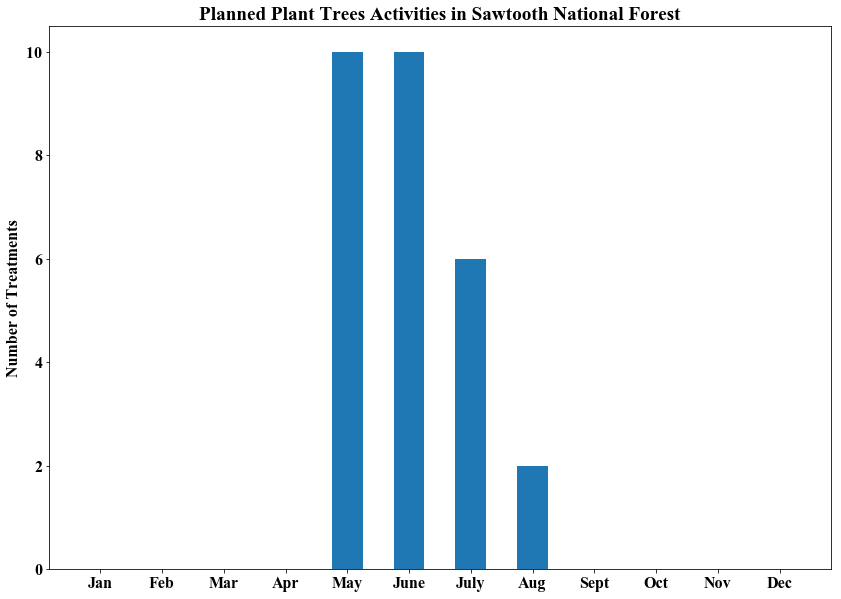

In [69]:
fig5 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

month_p_planttrees = p_planttrees_months2['M'].values
values_p_planttrees = p_planttrees_months2['count'].values

plt.bar(month_p_planttrees, values_p_planttrees, width=0.5)
plt.xticks(month_p_planttrees, ('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
plt.ylabel('Number of Treatments')
plt.title('Planned Plant Trees Activities in Sawtooth National Forest')

plt.show()

In [70]:
c_planttrees_months2 = df
c_planttrees_months2

,M,count
0,1,0
1,2,0
2,3,0
3,4,0
4,5,2
5,6,18
6,7,0
7,8,0
8,9,2
9,10,6


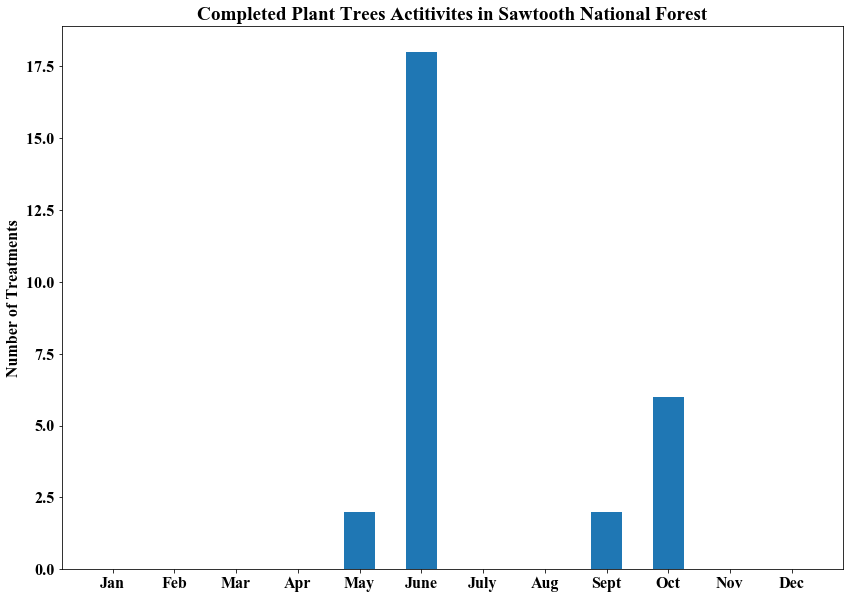

In [72]:
fig6 = plt.figure(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

month_c_planttrees = c_planttrees_months2['M'].values
values_c_planttrees = c_planttrees_months2['count'].values

plt.bar(month_c_planttrees, values_c_planttrees, width=0.5)
plt.xticks(month_c_planttrees, ('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
plt.ylabel('Number of Treatments')
plt.title('Completed Plant Trees Actitivites in Sawtooth National Forest')

plt.show()

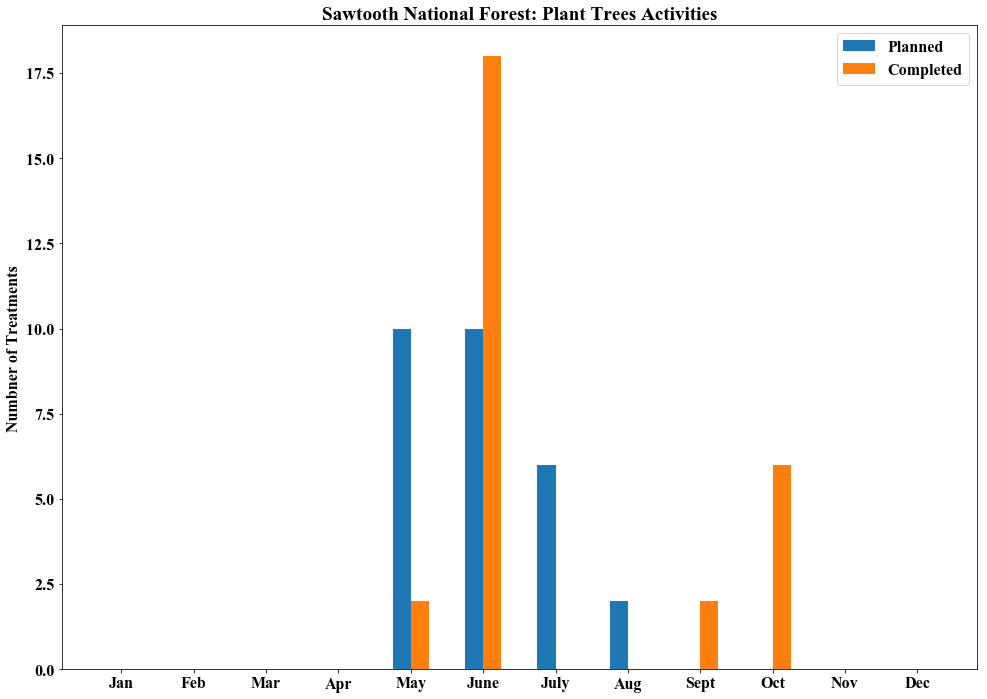

In [75]:
fig7, ax = plt.subplots(figsize=(14.0,10.0))

plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family']='Times New Roman'

ind = np.arange(len(month_p_planttrees))
width = 0.25

rects1 = ax.bar(ind - width/2, values_p_planttrees, width, label='Planned')
rects2 = ax.bar(ind + width/2, values_c_planttrees, width, label='Completed')

ax.set_ylabel('Numbner of Treatments')
ax.set_title('Sawtooth National Forest: Plant Trees Activities')
ax.set_xticks(ind)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
ax.legend()

def autolabel(rects, xpos='center'):
    ha = {'center': 'center','right': 'left','left':'right'}
    offset = {'center':0,'right':1,'left':-1}
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3,3),
                    textcoords="offset points",
                    ha=ha[xpos], va = 'bottom')
        
#autolabel(rects1, "left")
#autolabel(rects2, "right")

fig7.tight_layout()
plt.savefig(output_data_dir + 'SNF_PlantTrees_Month.png', edgecolor='black', bbox_inches='tight', pad_inches=0.25)              

plt.show()